<a href="https://colab.research.google.com/github/Tanveer132/Neural-Network/blob/main/FST_LSTM_RNN_on_Sample_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create sample data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=np.array([1,2,3,4,5,6,7,8,9])

In [3]:
#create features and target data
#features= 3
n_features=3
x=[]
y=[]
for i in range(n_features,len(data)):
  x.append(data[i-n_features:i])
  y.append(data[i])
x,y=np.array(x),np.array(y)

In [4]:
x.shape,y.shape

((6, 3), (6,))

In [5]:
#reshape x as [row,n_features,1]
x=x.reshape(x.shape[0],x.shape[1],1)
x.shape

(6, 3, 1)

Build model

In [6]:
from keras.layers import LSTM
from keras.layers import Dense
from keras import Sequential

In [7]:
#build model
model=Sequential()
model.add(LSTM(50,activation='relu',input_shape=(n_features,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


Fit model

In [12]:
#fit model
history=model.fit(x,y,epochs=100,batch_size=1,verbose=0)

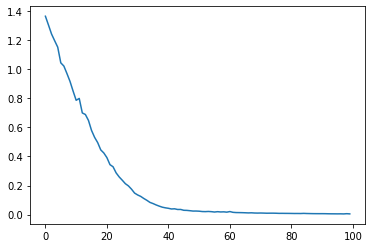

In [13]:
plt.plot(history.history['loss'])

In [14]:
test=np.array([7,8,9])
test=test.reshape(1,n_features,1)
test.shape

(1, 3, 1)

In [15]:
output=model.predict(test)
output

array([[9.671883]], dtype=float32)

**Stacked LSTM**

In [18]:
#build model
#Two lstm layers are stacked 
model=Sequential()
model.add(LSTM(100,activation='relu',return_sequences=True, input_shape=(n_features,1)))
model.add(LSTM(50,activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 3, 100)            40800     
_________________________________________________________________
lstm_6 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [19]:
#fit model
history=model.fit(x,y,epochs=100,batch_size=1,verbose=0)

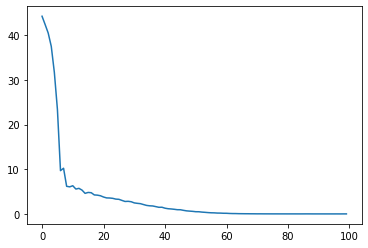

In [20]:
plt.plot(history.history['loss'])

In [21]:
output=model.predict(test)
output

array([[9.701557]], dtype=float32)

**Bidirectional LSTM**

In [28]:
from keras.layers import Bidirectional

#data is given bidirectional
#max 100 epochs
model=Sequential()
model.add(Bidirectional(LSTM(100,activation='relu'),input_shape=(n_features,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_2 (Bidirection (None, 200)               81600     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 201       
Total params: 81,801
Trainable params: 81,801
Non-trainable params: 0
_________________________________________________________________


In [26]:
#fit model
history=model.fit(x,y,epochs=100,batch_size=1,verbose=0)

In [27]:
output=model.predict(test)
output

array([[9.657939]], dtype=float32)